In [1]:
pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
from game import *

def run_the_sim(game):
    return game.play_until_winner()

In [3]:
player_list = ["Player1", "Player2", "Player3", "Player4"]
strategies = ["strategy_1", "strategy_2", "strategy_3", "strategy_4"]

players = create_players(player_list, strategies)
game = Game(players)

win_counts = {player: 0 for player in player_list}
tie_count = 0
results = []

========================Starting a new game!========================


In [4]:
# Run 1,000 simulations
for i in range(0, 1000):
    winner = run_the_sim(game)
    if winner in win_counts:
        win_counts[winner] += 1
        results.append(winner)
    elif winner == "Tie":
        tie_count += 1
        #results.append("Tie")

========================Starting a new game!========================
Player1 played the Countess card!
Player2 played the King card!
selected guard
Player3 played the Guard card!
Handmaid
Player3 guessed wrong! Player4 does not have the Handmaid card.
Player4 played the Baron card!
Player2 eliminated in a Baron comparison!
Player1 played the Handmaid card!
Player3 played the Prince card!
Player4 redrew a card.
selected guard
Player4 played the Guard card!
Player4 guessed wrong! Player3 does not have the <cards.Handmaid object at 0x12791ec60> card.
Player1 played the Priest card!
Player3 played the Princess card!
Player3 eliminated for discarding the Princess!
selected guard
Player4 played the Guard card!
Player4 guessed wrong! Player1 does not have the <cards.Handmaid object at 0x12791e990> card.
selected guard
Player1 played the Guard card!
Player1 guessed wrong! Player4 does not have the Princess card.
Winner of this round: Player1 with the highest card value (4)!
===================

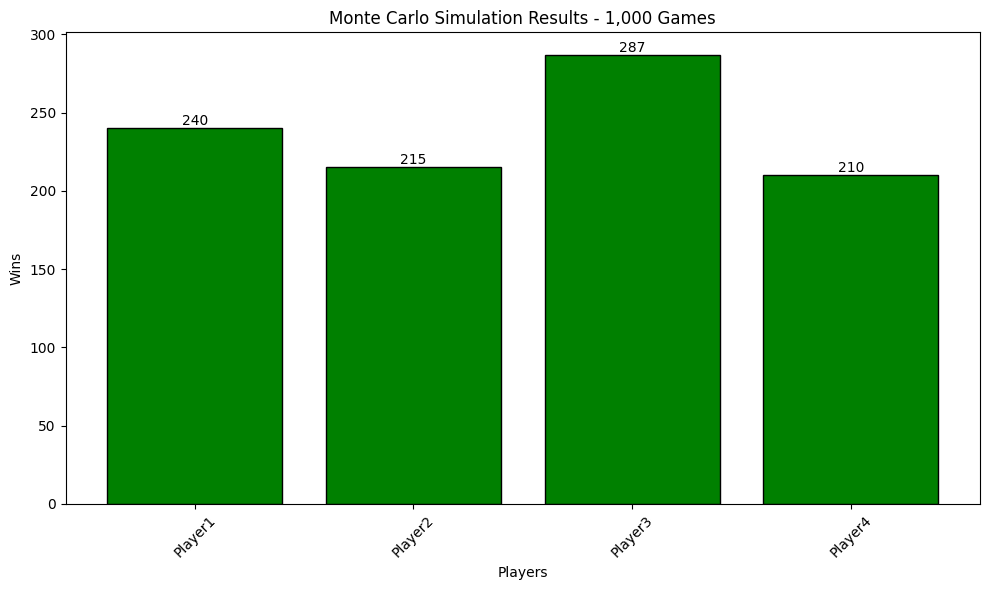

In [5]:
# Plotting for 1,000 simulations

player_counts = {player: results.count(player) for player in player_list}

plt.figure(figsize=(10, 6))
bars = plt.bar(player_counts.keys(), player_counts.values(), color='green', edgecolor='black')

for bar in bars:
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=10)

plt.title("Monte Carlo Simulation Results - 1,000 Games")
plt.xlabel("Players")
plt.ylabel("Wins")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [6]:
# Run for 10,000 simulations

#Reset for the new sims
game = Game(players)
win_counts = {player: 0 for player in player_list}
tie_count = 0
results = []

for i in range(0, 10000):
    winner = run_the_sim(game)
    if winner in win_counts:
        win_counts[winner] += 1
        results.append(winner)
    elif winner == "Tie":
        tie_count += 1
        results.append("Tie")

========================Starting a new game!========================
========================Starting a new game!========================
selected guard
Player1 played the Guard card!
Player1 guessed wrong! Player3 does not have the Princess card.
Player2 played the Priest card!
Player3 played the Countess card!
Player4 played the Baron card!
Player2 eliminated in a Baron comparison!
selected guard
Player1 played the Guard card!
Player1 guessed wrong! Player3 does not have the Princess card.
selected guard
Player3 played the Guard card!
Handmaid
Player3 guessed wrong! Player4 does not have the Handmaid card.
selected guard
Player4 played the Guard card!
Player4 guessed wrong! Player1 does not have the <cards.Handmaid object at 0x1279c72c0> card.
Player1 played the Handmaid card!
Player3 played the Prince card!
Player4 redrew a card.
selected guard
Player4 played the Guard card!
Player4 guessed wrong! Player3 does not have the <cards.Baron object at 0x1279c7c80> card.
Player1 played the

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



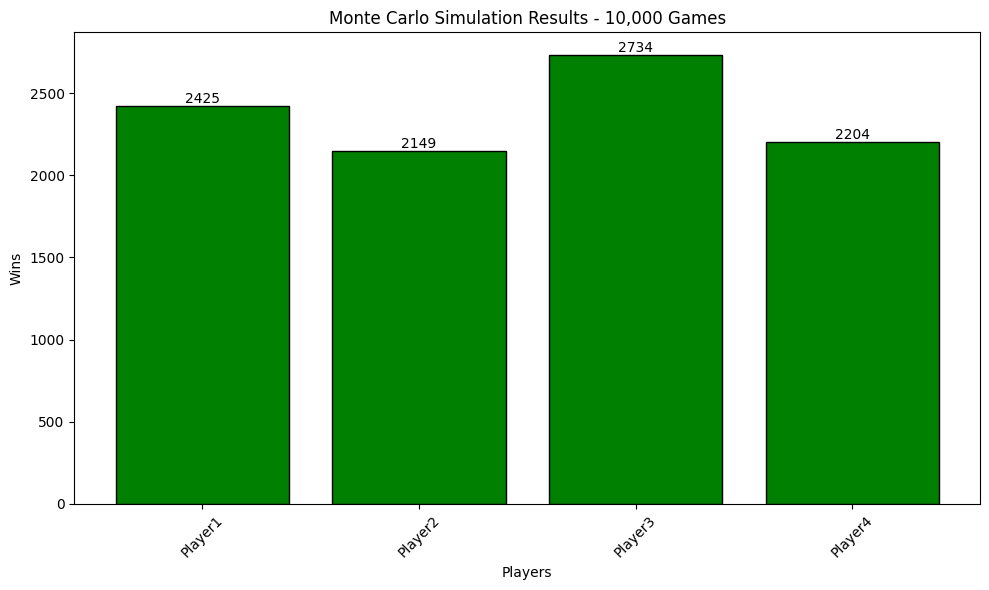

In [7]:
player_counts = {player: results.count(player) for player in player_list}

plt.figure(figsize=(10, 6))
bars = plt.bar(player_counts.keys(), player_counts.values(), color='green', edgecolor='black')

for bar in bars:
    height = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom', fontsize=10)

plt.title("Monte Carlo Simulation Results - 10,000 Games")
plt.xlabel("Players")
plt.ylabel("Wins")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [13]:
def normalize(wins, num_games):
    return wins/num_games

normalized_results = []

def run_normalization(player_counts, results):
    for player_count in player_counts.items():
        normalized_results.append(normalize(player_count[1], len(results)))
    return normalized_results
    
    


In [14]:
print(normalized_results)

[]


In [15]:
# Run for 10,000 simulations

def run_sim(num_games):
    #Reset for the new sims
    game = Game(players)
    win_counts = {player: 0 for player in player_list}
    tie_count = 0
    results = []
    
    for i in range(0, num_games):
        winner = run_the_sim(game)
        if winner in win_counts:
            win_counts[winner] += 1
            results.append(winner)
        elif winner == "Tie":
            tie_count += 1
            results.append("Tie")
    player_counts = {player: results.count(player) for player in player_list}
    return player_counts, results

player_counts, results = run_sim(1000)
# print(player_counts, results)

normalized_results = run_normalization(player_counts, results)

print(normalized_results)


    

========================Starting a new game!========================
========================Starting a new game!========================
Player1 played the Handmaid card!
selected guard
Player2 played the Guard card!
card is <cards.Guard object at 0x127c90cb0>
Player2 guessed wrong! Player4 does not have the <cards.Baron object at 0x127c934a0> card.
selected guard
Player3 played the Guard card!
Guard
Player3 guessed correctly! Player2 had the Guard card.
Player4 played the Baron card!
Player3 eliminated in a Baron comparison!
Player1 played the Priest card!
Player4 played the Prince card!
Player1 redrew a card.
Player1 played the Prince card!
Player4 redrew a card.
Player4 played the King card!
selected guard
Player1 played the Guard card!
Player1 guessed wrong! Player4 does not have the Princess card.
Player4 played the Princess card!
Player4 eliminated for discarding the Princess!
Winner of this round: Player1!
========================Starting a new game!========================
sel

In [ ]:
def run_multiple_sims(num_runs):
    player_counts, results = run_sim(num_runs)
    # print(player_counts, results)
    
    normalized_results = run_normalization(player_counts, results)
    return normalized_results


player1_results = []
player2_results = []
player3_results = []
player4_results = []
ties_results = []

def aggregate_normalized_result(normalized_result):
    for result in normalized_result:
        player1 = result[0]
        player2 = result[1]
        player3 = result[2]
        player4 = result[3]
        ties = result[4]
        player1_results.append(player1)
        player2_results.append(player2)
        player3_results.append(player3)
        player4_results.append(player4)
        ties_results.append(ties)
    return player1_results, player2_results, player3_results, player4_results, tie_results
        

            

normalized_results = []

import pandas as pd
df = pd.DataFrame()

df['i'] = ""
df['normalized_result'] = ""

for i in range(1, 100):
    normalized_result = run_multiple_sims(i)
    # normalized_results.append(normalized_result)
    df.loc['i'] = i
    df.loc['normalized_result'] = normalized_result
    
    
# print(normalized_results)
    


    

In [ ]:
import matplotlib.pyplot as plt
plt.plot()